In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip '17810_23812_bundle_archive.zip' -d

error:  must specify directory to which to extract with -d option


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.2.0


In [6]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

### Group parameters for train and test data generators

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
train_data = train_datagen.flow_from_directory('../data/chest_xray/train_2//',
                                               target_size=(299,299),
                                               batch_size=32,
                                               class_mode='binary')
val_data = val_datagen.flow_from_directory('../data/chest_xray/val/',
                                               target_size=(299,299),
                                               batch_size=32,
                                               class_mode='binary')
test_data = test_datagen.flow_from_directory('../data/chest_xray/test//',
                                             target_size=(299,299),
                                             batch_size=32,
                                             class_mode='binary')

Found 2568 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(299,299,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

In [10]:
history = model.fit(train_data, epochs=15, validation_data=(val_data), steps_per_epoch=len(train_data), validation_steps=len(val_data))

Epoch 1/15
81/81 [==============================] - 375s 5s/step - loss: 6.0526 - accuracy: 0.6928 - precision: 0.7127 - recall: 0.7549 - val_loss: 0.5076 - val_accuracy: 0.7964 - val_precision: 0.9915 - val_recall: 0.6784
Epoch 2/15
81/81 [==============================] - 276s 3s/step - loss: 0.3898 - accuracy: 0.8228 - precision: 0.8312 - recall: 0.8572 - val_loss: 0.2982 - val_accuracy: 0.8727 - val_precision: 0.9527 - val_recall: 0.8343
Epoch 3/15
81/81 [==============================] - 280s 3s/step - loss: 0.3380 - accuracy: 0.8540 - precision: 0.8646 - recall: 0.8760 - val_loss: 0.2821 - val_accuracy: 0.8636 - val_precision: 0.8650 - val_recall: 0.9235
Epoch 4/15
81/81 [==============================] - 201s 2s/step - loss: 0.2783 - accuracy: 0.8867 - precision: 0.8967 - recall: 0.9011 - val_loss: 0.1950 - val_accuracy: 0.9236 - val_precision: 0.9578 - val_recall: 0.9191
Epoch 5/15
81/81 [==============================] - 182s 2s/step - loss: 0.2651 - accuracy: 0.8921 - precisi

In [11]:
acc = model.evaluate_generator(test_data, steps=len(test_data), verbose=1)
list(zip(model.metrics_names, acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
20/20 [==============================] - 18s 888ms/step - loss: 0.6348 - accuracy: 0.8125 - precision: 0.7803 - recall: 0.9744


[('loss', 0.634788453578949),
 ('accuracy', 0.8125),
 ('precision', 0.7802874445915222),
 ('recall', 0.9743589758872986)]

In [12]:
type(test_data)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [15]:
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 299, 299, 3)
(16, 299, 299, 3)


(624, 299, 299, 3)

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_curve, auc, classification_report, confusion_matrix
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [31]:
preds = model_load.predict_classes(data_array)

              precision    recall  f1-score   support

      NORMAL       0.93      0.54      0.68       234
   PNEUMONIA       0.78      0.97      0.87       390

    accuracy                           0.81       624
   macro avg       0.85      0.76      0.78       624
weighted avg       0.84      0.81      0.80       624

Accurancy:  0.8125


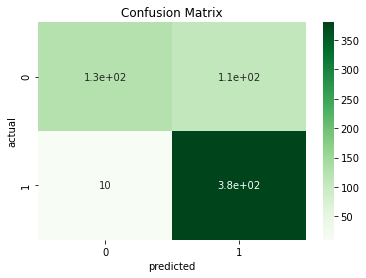

In [18]:
evaluation(class_list, preds)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use('fivethirtyeight')

In [21]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

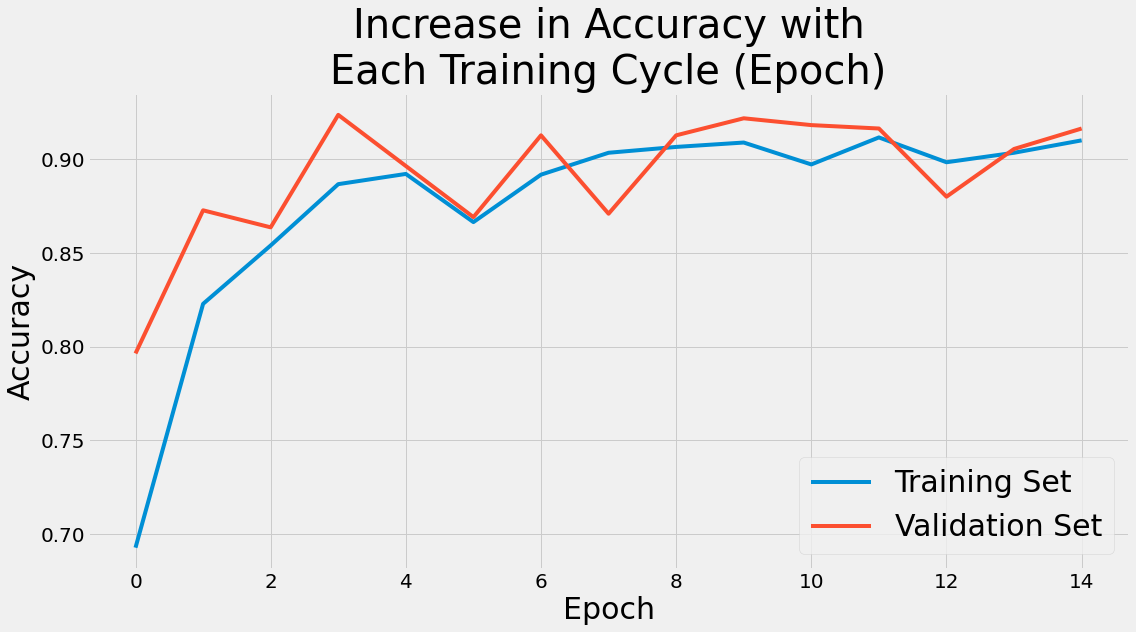

In [22]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax, label='Training Set')
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

# plt.savefig('accuracy_with_val.png', transparency=True)

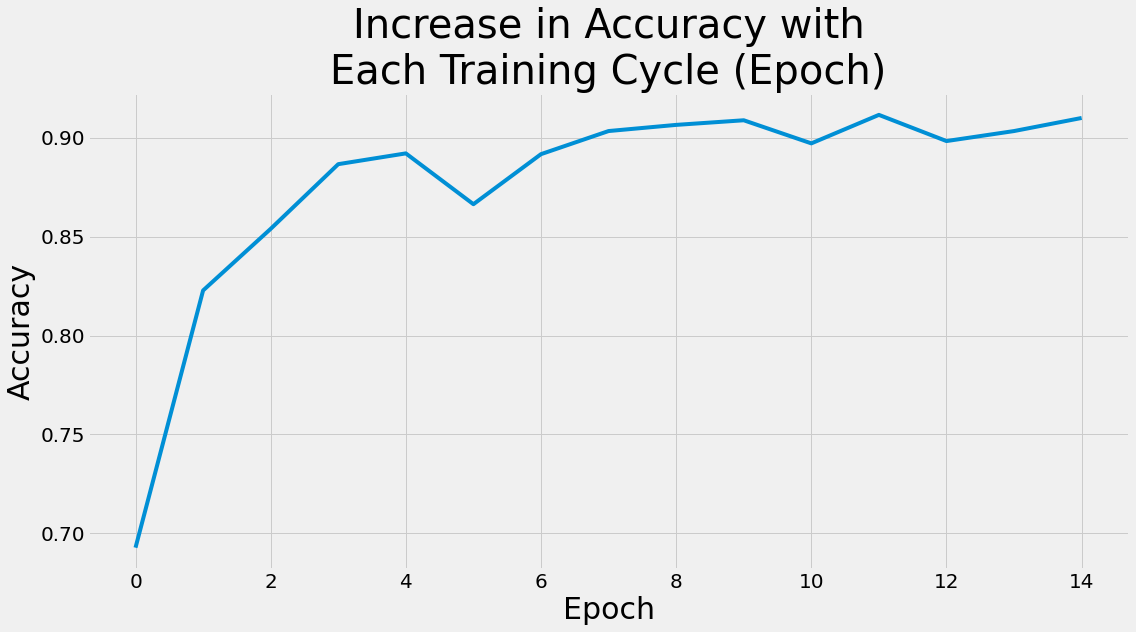

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
# sns.lineplot(range(len(loss)), loss, ax=ax[1])

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax[1])

ax.set_title("Increase in Accuracy with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='lower right', fontsize=30)
plt.tight_layout()

plt.savefig('accuracy.png', transparency=True)

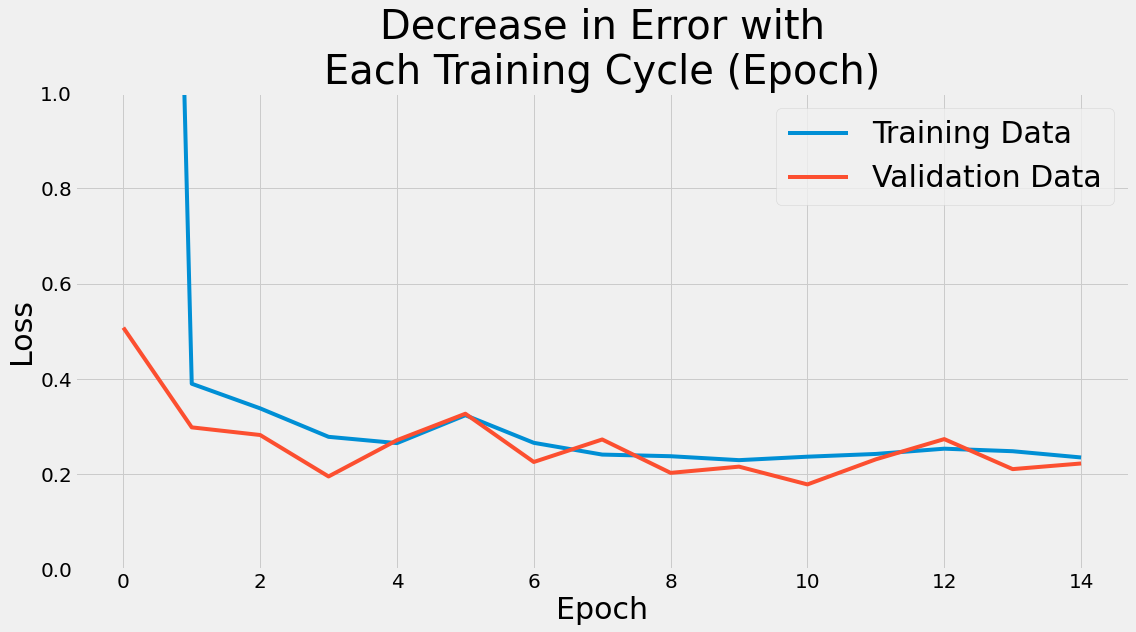

In [26]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax, label='Training Data')

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
ax.set_ylim(0,1)
ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss_with_val.png', transparency=True)

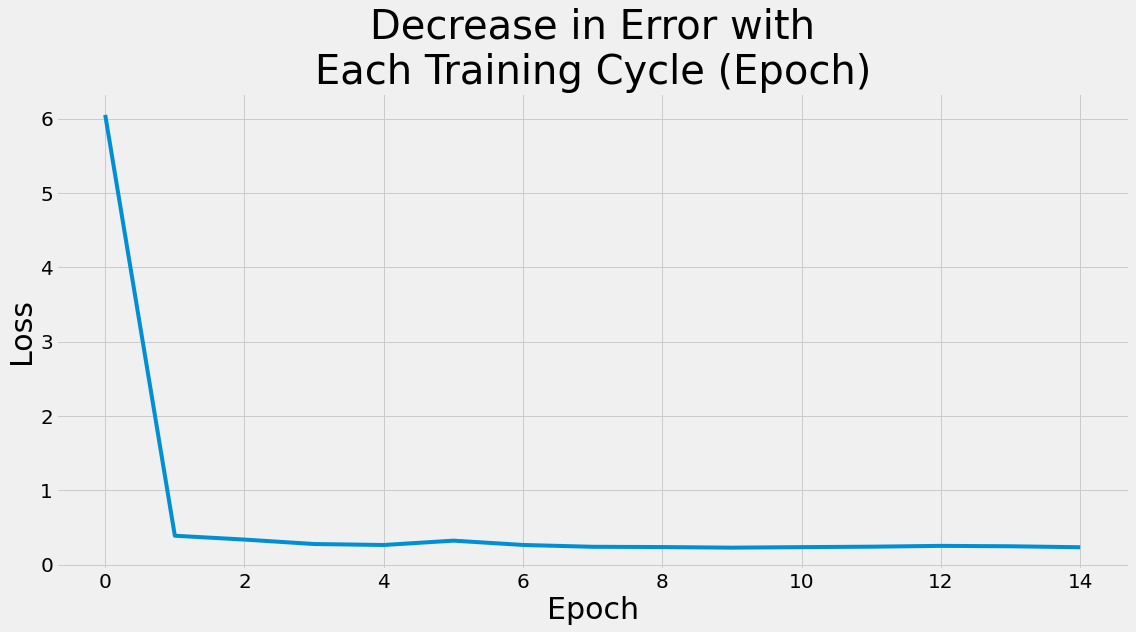

In [25]:
fig, ax = plt.subplots(1,1, figsize=(16,9))

# sns.lineplot(range(len(accuracy)), accuracy, ax=ax)
sns.lineplot(range(len(loss)), loss, ax=ax)

# sns.lineplot(range(len(val_accuracy)), val_accuracy, ax=ax, label='Validation Set')
# sns.lineplot(range(len(val_loss)), val_loss, ax=ax, label='Validation Data')

ax.set_title("Decrease in Error with\nEach Training Cycle (Epoch)", fontsize=40)
ax.set_ylabel('Loss', fontsize=30)
ax.set_xlabel('Epoch', fontsize=30)
ax.tick_params(labelsize='20')
# ax.legend(loc='upper right', fontsize=30)
plt.tight_layout()

plt.savefig('loss.png', transparency=True)